In [3]:
import pandas as pd

In [4]:
tt=pd.read_csv("Data-cleaning-on-titanic.csv")
tt.info()
tt.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183584 entries, 0 to 183583
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   183584 non-null  int64  
 1   PassengerId  183584 non-null  int64  
 2   Survived     183584 non-null  int64  
 3   Pclass       183584 non-null  int64  
 4   Name         183584 non-null  object 
 5   Sex          183584 non-null  object 
 6   Age          183584 non-null  int64  
 7   SibSp        183584 non-null  int64  
 8   Parch        183584 non-null  int64  
 9   Ticket       183584 non-null  object 
 10  Fare         183584 non-null  float64
 11  Embarked     183584 non-null  object 
dtypes: float64(1), int64(7), object(4)
memory usage: 16.8+ MB


,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183584.000000,1.835840e+05,183584.000000,183584.000000,183584.000000,183584.000000,183584.000000,183584.000000
mean,499635.059858,5.009451e+05,0.380698,2.313633,29.333640,0.511668,0.357629,33.318881
std,288734.506506,2.887345e+05,0.485560,0.835408,12.733832,1.111007,0.764884,47.820952
min,2.000000,1.312000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,250123.250000,2.514332e+05,0.000000,2.000000,21.000000,0.000000,0.000000,8.536146
50%,500298.500000,5.016085e+05,0.000000,3.000000,29.000000,0.000000,0.000000,15.845538
75%,749015.500000,7.503255e+05,1.000000,3.000000,37.000000,1.000000,0.000000,35.485576
max,999998.000000,1.001308e+06,1.000000,3.000000,100.000000,8.000000,6.000000,639.557351


In [5]:
tt.drop(columns=['Unnamed: 0'], inplace=True)
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183584 entries, 0 to 183583
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  183584 non-null  int64  
 1   Survived     183584 non-null  int64  
 2   Pclass       183584 non-null  int64  
 3   Name         183584 non-null  object 
 4   Sex          183584 non-null  object 
 5   Age          183584 non-null  int64  
 6   SibSp        183584 non-null  int64  
 7   Parch        183584 non-null  int64  
 8   Ticket       183584 non-null  object 
 9   Fare         183584 non-null  float64
 10  Embarked     183584 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 15.4+ MB


 Exploratory Data Analysis (EDA):

In [7]:
#What is the total number of survivors
tt['Survived'].value_counts()

Survived
0    113694
1     69890
Name: count, dtype: int64

In [8]:
#What is the survival rate by class (Pclass)
k=tt.groupby('Pclass')['Survived'].mean()

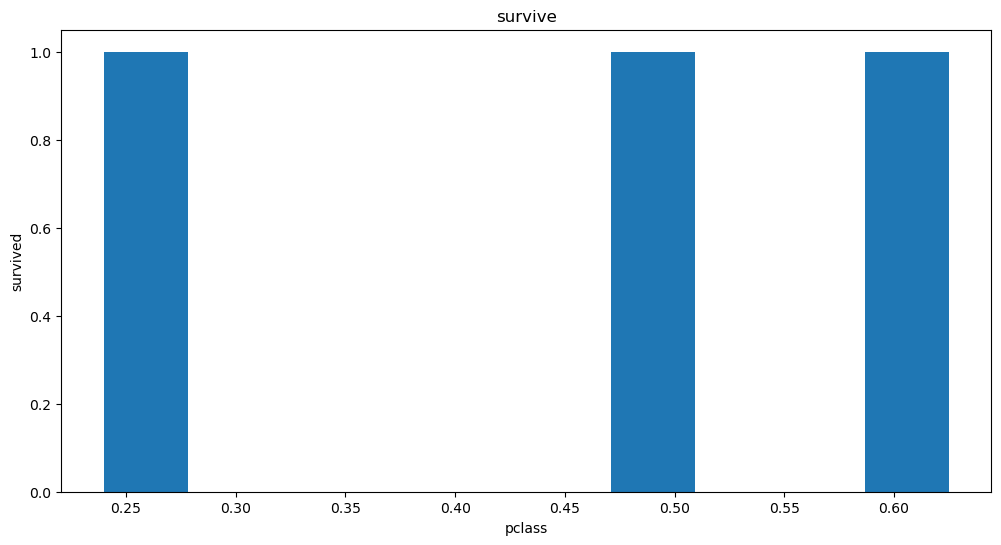

In [9]:
import matplotlib.pyplot as plt
k.plot(kind="hist",figsize=(12,6), title="survive")
plt.xlabel("pclass")
plt.ylabel("survived")
plt.show()

In [10]:
#What is the distribution of Age and Fare?
a=tt['Age'].describe()
f=tt['Fare'].describe()

Text(0, 0.5, 'fare')

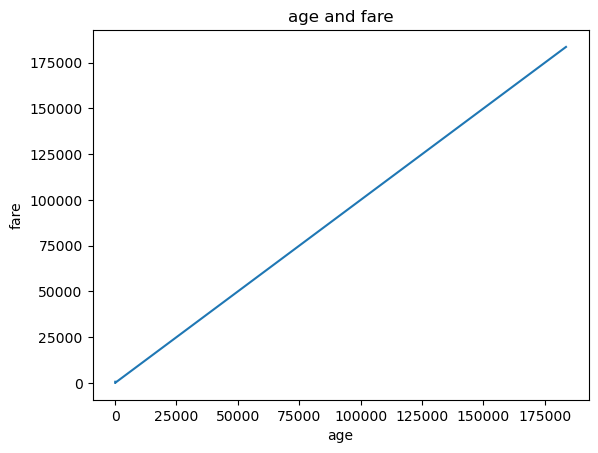

In [11]:
import matplotlib.pyplot as plt

plt.plot(a,f)
plt.title('age and fare')
plt.xlabel("age")
plt.ylabel("fare")


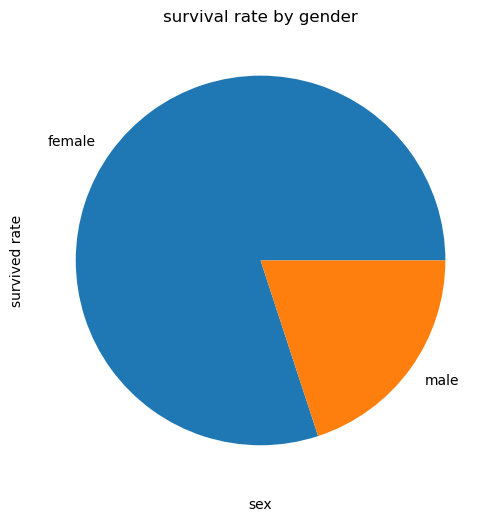

In [12]:
#What is the survival rate by gender (Sex)?
k=tt.groupby('Sex')['Survived'].mean()
k
k.plot(kind="pie" ,figsize=(12,6), title="survival rate by gender")
plt.xlabel("sex")
plt.ylabel("survived rate")
plt.show()

Embarked
C    0.541347
Q    0.379427
S    0.339042
Name: Survived, dtype: float64


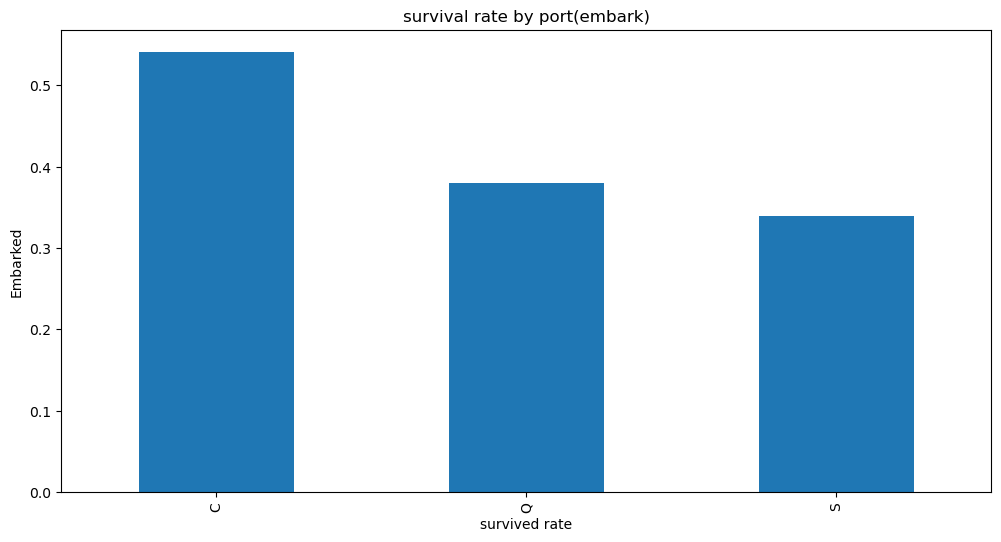

In [13]:
#How does survival rate vary by Embarked (port of boarding)?
b=tt.groupby('Embarked')['Survived'].mean()
print(b)
b.plot(kind="bar" ,figsize=(12,6), title="survival rate by port(embark)")
plt.xlabel("survived rate")
plt.ylabel("Embarked")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183584 entries, 0 to 183583
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  183584 non-null  int64  
 1   Survived     183584 non-null  int64  
 2   Pclass       183584 non-null  int64  
 3   Name         183584 non-null  object 
 4   Sex          183584 non-null  object 
 5   Age          183584 non-null  int64  
 6   SibSp        183584 non-null  int64  
 7   Parch        183584 non-null  int64  
 8   Ticket       183584 non-null  object 
 9   Fare         183584 non-null  float64
 10  Embarked     183584 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 15.4+ MB
None


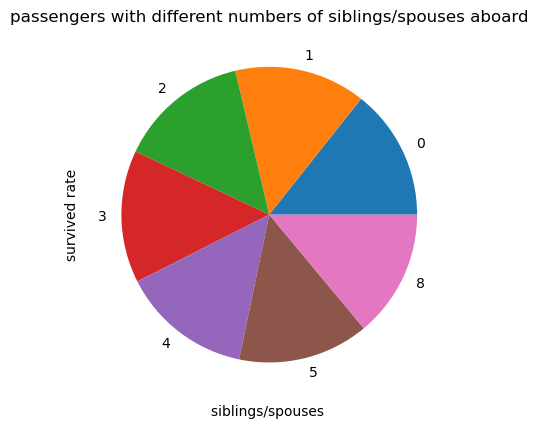

In [14]:
print(tt.info())

#What is the relationship between SibSp (siblings/spouses aboard) and survival?
s=tt.groupby('SibSp')['PassengerId'].mean()
s.plot(kind="pie",title="passengers with different numbers of siblings/spouses aboard")
plt.xlabel("siblings/spouses ")
plt.ylabel("survived rate")
plt.show()

Feature Engineering:


In [16]:
#Can we create new features like FamilySize (SibSp + Parch)?
tt['tot_family']=tt['SibSp']+tt['Parch']

In [17]:
#Can we categorize Age into different age groups?


In [31]:

def categorize_age(age):
    if age < 10:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Old'

tt['Age_Category'] = tt['Age'].apply(categorize_age)



In [35]:
#Can we extract titles from Name?
tt['Title'] = tt['Name'].str.extract(r',\s*([^\.]+)\.')

#or
'''def extract_title(name):
    return name.split(",")[1].split(".")[0].strip()

tt['Title'] = tt['Name'].apply(extract_title)
print(tt)'''

'def extract_title(name):\n    return name.split(",")[1].split(".")[0].strip()\n\ntt[\'Title\'] = tt[\'Name\'].apply(extract_title)\nprint(tt)'

In [37]:
title_survival = tt.groupby('Title')['Survived'].mean()
print(title_survival)

Title
Capt            0.167488
Col             0.201970
Don             0.166667
Dr              0.257019
Lady            0.791139
Major           0.186603
Master          0.643039
Miss            0.749126
Mlle            0.733696
Mme             0.739394
Mr              0.184114
Mrs             0.755539
Ms              0.783920
Rev             0.187050
Sir             0.210784
the Countess    0.774011
Name: Survived, dtype: float64


ANALYSIS

In [40]:
# Calculate the overall survival rate
overall_survival_rate = tt['Survived'].mean() * 100
print(f"Overall Survival Rate: {overall_survival_rate:.2f}%")


Overall Survival Rate: 38.07%


Pclass  Sex   
1       female    97.364008
        male      36.134021
2       female    91.970990
        male      15.727968
3       female    50.163316
        male      13.215023
Name: Survived, dtype: float64


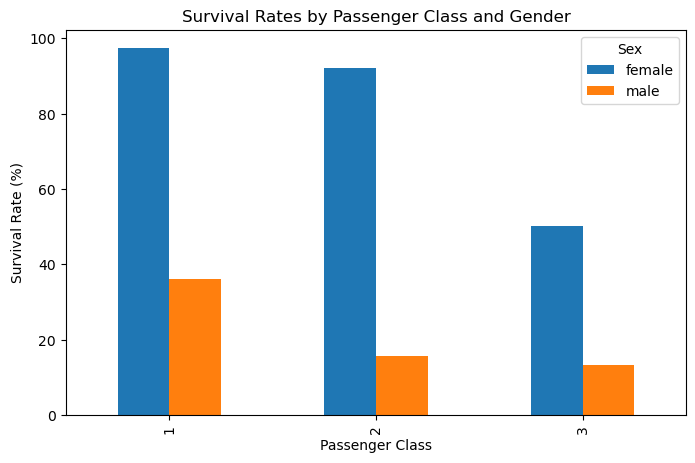

In [42]:
# Survival Rate by Passenger Class and Gender
survival_by_class_gender = tt.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100
print(survival_by_class_gender)

# Optional: To visualize it using a bar plot
survival_by_class_gender.unstack().plot(kind='bar', figsize=(8, 5))
plt.title("Survival Rates by Passenger Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.show()


Family_Size
0     30.116900
1     55.833059
2     58.513361
3     70.947247
4     28.303716
5     14.621849
6     20.820990
7      2.077922
8     45.454545
10     2.954117
Name: Survived, dtype: float64


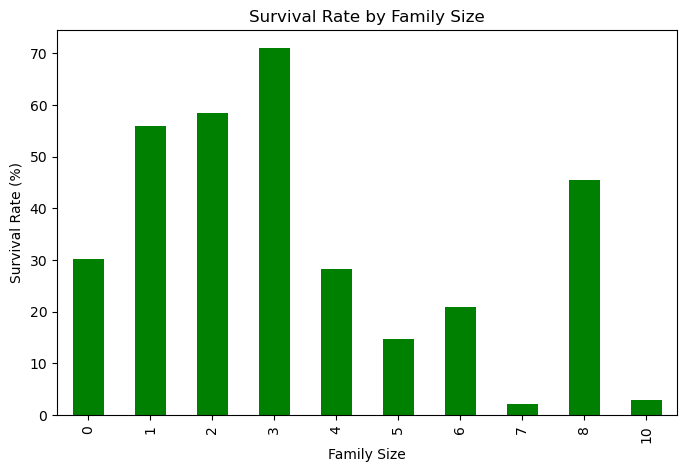

In [44]:
# Add Family Size Column
tt['Family_Size'] = tt['SibSp'] + tt['Parch']

# Calculate Survival Rate by Family Size
family_survival_rate = tt.groupby('Family_Size')['Survived'].mean() * 100
print(family_survival_rate)

# Optional: Visualize Family Size vs. Survival Rate
family_survival_rate.plot(kind='bar', figsize=(8, 5), color='green')
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate (%)")
plt.show()


C:\Users\jayan\AppData\Local\Temp\ipykernel_22500\3543842300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = tt.groupby('Age_Group')['Survived'].mean() * 100


Age_Group
0-10      47.245973
11-20     40.975078
21-30     36.937810
31-40     34.742766
41-50     37.445897
51-60     38.536722
61-70     35.312500
71-80     24.561404
81-90     14.285714
91-100    38.461538
Name: Survived, dtype: float64


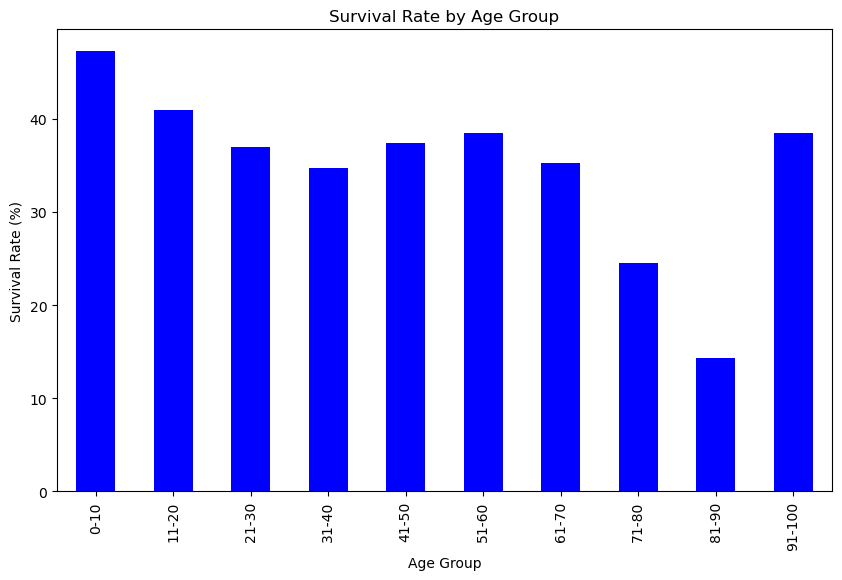

In [46]:
# Grouping Age into Bins and calculating survival rates
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
tt['Age_Group'] = pd.cut(tt['Age'], bins=age_bins, labels=age_labels)

# Calculate Survival Rate by Age Group
age_survival_rate = tt.groupby('Age_Group')['Survived'].mean() * 100
print(age_survival_rate)

# Visualize Age Group vs. Survival Rate
age_survival_rate.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate (%)")
plt.show()


Title
Capt            16.748768
Col             20.197044
Don             16.666667
Dr              25.701944
Lady            79.113924
Major           18.660287
Master          64.303894
Miss            74.912564
Mlle            73.369565
Mme             73.939394
Mr              18.411433
Mrs             75.553935
Ms              78.391960
Rev             18.705036
Sir             21.078431
the Countess    77.401130
Name: Survived, dtype: float64


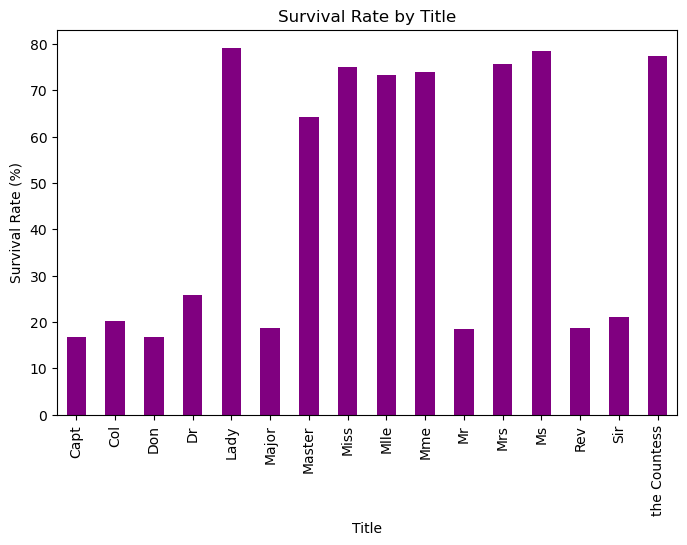

In [48]:
# Extract Titles from Name
tt['Title'] = tt['Name'].str.extract(r',\s*([^\.]+)\.')

# Survival Rate by Title
title_survival_rate = tt.groupby('Title')['Survived'].mean() * 100
print(title_survival_rate)

# Visualize Title vs. Survival Rate
title_survival_rate.plot(kind='bar', figsize=(8, 5), color='purple')
plt.title("Survival Rate by Title")
plt.xlabel("Title")
plt.ylabel("Survival Rate (%)")
plt.show()
